# Identificar fronteras no lineales

In [12]:
import numpy as np
from sklearn.datasets.samples_generator import make_circles
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [17]:
X, Y = make_circles(n_samples=100, factor=0.1, noise=0.1)

In [18]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim() # [xlim[0], xlim[1]] -> Límite inferior y superior del eje X
    ylim = ax.get_ylim() # [ylim[0], ylim[1]] -> Límite inferior y superior del eje Y
    
    #Generamos la parrilla de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    #Evaluar el modelo
    xy = np.vstack([X.ravel(), Y.ravel()]).T #Tupla
    P = model.decision_function(xy).reshape(X.shape)
    
    #Representamos las fronteras y los márgenes del SVC
    ax.contour(X, Y, P, colors = "k", levels = [-1,0,1], alpha = 0.5, linestyles=["--","-","--"])
    
    print(model.support_vectors_)
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                  s = 300, linewidth = 1, facecolors="black")
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

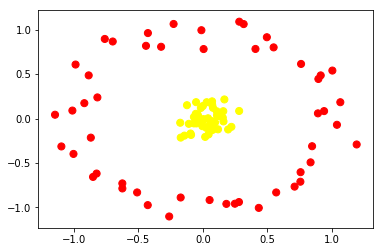

In [19]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

[[-4.25594057e-01  9.62577727e-01]
 [-1.05243128e-02  9.94736732e-01]
 [ 8.97223824e-01  4.45323360e-01]
 [-8.85081027e-01  4.85939153e-01]
 [ 7.57594840e-01 -7.11880045e-01]
 [ 2.83280864e-01  1.09072532e+00]
 [-1.01165431e+00  8.94243545e-02]
 [-3.23223014e-01  8.08087036e-01]
 [ 1.19430967e+00 -2.92399780e-01]
 [-6.24057074e-01 -7.30810716e-01]
 [-5.09280655e-01 -8.32676415e-01]
 [-2.26322237e-01  1.06497112e+00]
 [ 5.31104212e-02 -9.18305994e-01]
 [ 5.49922693e-01  8.01284122e-01]
 [ 9.41443072e-01  8.35970157e-02]
 [-6.23835075e-01 -7.87809790e-01]
 [ 4.09012296e-01  7.83659776e-01]
 [-8.23679169e-01 -6.20019135e-01]
 [ 3.17412984e-01  1.06370452e+00]
 [ 4.34818594e-01 -1.00678846e+00]
 [ 9.15326005e-01  4.85745082e-01]
 [ 7.12677647e-01 -7.67159323e-01]
 [ 7.62832729e-01  6.14756060e-01]
 [-2.60443973e-01 -1.10350694e+00]
 [-1.71393141e-01 -8.89832000e-01]
 [ 7.59089733e-01 -6.04541439e-01]
 [ 4.97397878e-01  9.15662855e-01]
 [-4.26796637e-01 -9.75585007e-01]
 [ 5.69838198e-01 -8

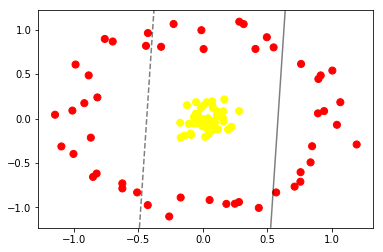

In [20]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [21]:
r = np.exp(-(X**2).sum(1))
r

array([0.33032238, 0.37172092, 0.36665883, 0.36077338, 0.98816843,
       0.99260124, 0.95828758, 0.33935004, 0.28085134, 0.35649283,
       0.46884748, 0.9921562 , 0.22049655, 0.92840559, 0.39711414,
       0.99694469, 0.38569175, 0.30562842, 0.42908227, 0.99501695,
       0.38888515, 0.40930138, 0.36428656, 0.9841872 , 0.98900459,
       0.99601498, 0.45775842, 0.34546253, 0.2916449 , 0.96646386,
       0.30038502, 0.34171782, 0.33405726, 0.97601068, 0.99224693,
       0.38295462, 0.97822741, 0.27649608, 0.43991375, 0.38996918,
       0.99194905, 0.33761702, 0.98028079, 0.99680879, 0.96835967,
       0.32176897, 0.98170152, 0.98936987, 0.36127139, 0.98546836,
       0.99262083, 0.96317907, 0.91673199, 0.97871907, 0.98483985,
       0.42126222, 0.97114522, 0.98660717, 0.94753688, 0.41710402,
       0.2682452 , 0.26085993, 0.96319043, 0.99830898, 0.9273229 ,
       0.94341399, 0.97152927, 0.38347063, 0.95831726, 0.33649082,
       0.99992548, 0.38914364, 0.97946183, 0.99454828, 0.31415

In [22]:
from mpl_toolkits import mplot3d

In [24]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1], r, c=Y, s=50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("x[1]")
    ax.set_zlabel("r")

In [28]:
from ipywidgets import interact, fixed
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180], 
         X=fixed(X), Y=fixed(Y), r=fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-4.25594057e-01,  9.62577727e-01],
       [-1.05243128e-02,  9.94736732e-01],
       [ 8.97223824e-01,  4.45323360e-01],
       [-8.85081027e-01,  4.85939153e-01],
       [ 2.80186077e-02, -1.05437576e-01],
       [-3.07942137e-03, -8.61207663e-02],
       [-9.08670439e-02, -1.85338977e-01],
       [ 7.57594840e-01, -7.11880045e-01],
       [ 2.83280864e-01,  1.09072532e+00],
       [-1.01165431e+00,  8.94243545e-02],
       [-3.23223014e-01,  8.08087036e-01],
       [ 8.21704684e-02, -3.35072301e-02],
       [ 1.19430967e+00, -2.92399780e-01],
       [ 1.67721086e-01,  2.14840001e-01],
       [-6.24057074e-01, -7.30810716e-01],
       [-4.08095004e-03, -5.51664233e-02],
       [-5.09280655e-01, -8.32676415e-01],
       [-2.26322237e-01,  1.06497112e+00],
       [ 5.31104212e-02, -9.18305994e-01],
       [-6.86249449e-02,  1.69152946e-02],
       [ 5.49922693e-01,  8.01284122e-01],
       [ 9.41443072e-01,  8.35970157e-02],
       